In [9]:
import numpy as np
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

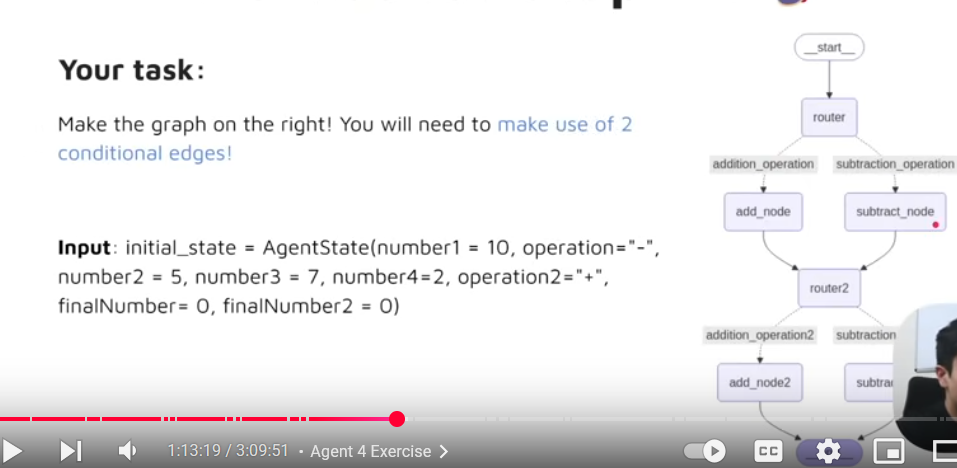

In [10]:
class AgentState(TypedDict):
    num1 : int
    num2 : int
    num3 : int
    num4 : int
    operation1 : str
    operation2 : str
    finalNum1 : int
    finalNum2 : int

In [11]:
# Defining node function
def add_node1(state:AgentState)->AgentState:
    state['finalNum1'] = state['num1'] + state['num2']
    return state
def add_node2(state:AgentState)->AgentState:
    state['finalNum2'] = state['num3'] + state['num4']
    return state
def sub_node1(state:AgentState)->AgentState:
    state['finalNum1'] = state['num1'] - state['num2']
    return state
def sub_node2(state:AgentState)->AgentState:
    state['finalNum2'] = state['num3'] - state['num4']
    return state
def decide_next_node1(state:AgentState)->AgentState:
    if(state['operation1']=='+'):
        return "add_operation1"
    elif(state['operation1']=='-'):
        return "sub_operation1"
def decide_next_node2(state:AgentState)->AgentState:
    if(state['operation2']=='+'):
        return "add_operation2"
    elif(state['operation2']=='-'):
        return "sub_operation2"

In [23]:
# Building the graph
graph = StateGraph(AgentState)

graph.add_node("add_node1",add_node1)
graph.add_node("add_node2",add_node2)
graph.add_node("sub_node1",sub_node1)
graph.add_node("sub_node2",sub_node2)
graph.add_node("router1",lambda state : state)
graph.add_node("router2",lambda state : state)

graph.add_edge(START,"router1")
graph.add_conditional_edges(
    "router1",
    decide_next_node1,
    {
        "add_operation1" : "add_node1",
        "sub_operation1" : "sub_node1"
    }
)

graph.add_edge("add_node1","router2")
graph.add_edge("sub_node1","router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "add_operation2" : "add_node2",
        "sub_operation2" : "sub_node2"
    }
)

graph.add_edge("add_node2",END)
graph.add_edge("sub_node2",END)
app = graph.compile()

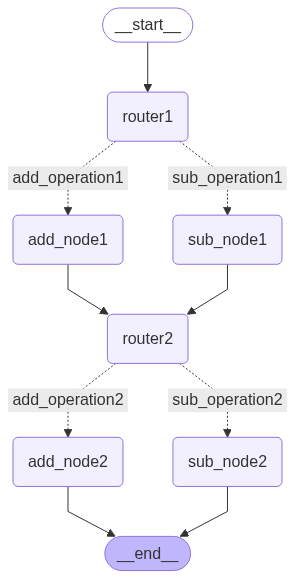

In [24]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [39]:
initial_state = {
    "num1": 5,
    "num2": 3,
    "operation1": "+",
    "num3": 12,
    "num4": 15,
    "operation2": "+",
}

result = app.invoke(initial_state)

In [40]:
result

{'num1': 5,
 'num2': 3,
 'num3': 12,
 'num4': 15,
 'operation1': '+',
 'operation2': '+',
 'finalNum1': 8,
 'finalNum2': 27}